In [1]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image doesn't exist, download it
if image_path.is_dir():
    print(f"{image_path} directory exist.")
else:
    print(f"Did not find {image_path} directory, creating one...")

    # Download pizza,steak,sushi data
    with open(data_path/"pizza_steak_sushi.zip","wb") as f:
        requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") 
        f.write(requests.content)

    # Unzip data
    with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
        print("Unzipping data")
        zip_ref.extractall(image_path)   

Did not find data\pizza_steak_sushi directory, creating one...
Unzipping data


In [2]:
import os
# Walks through dir_path
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [3]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [4]:
# Setup train and test path
train_dir = image_path/"train"
test_dir = image_path/"test"
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

#### Visualize an image

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


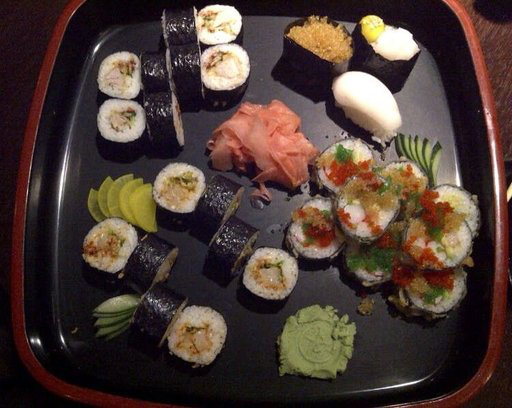

In [5]:
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
# Get random image path
random_image_path = random.choice(image_path_list)
# Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img
    

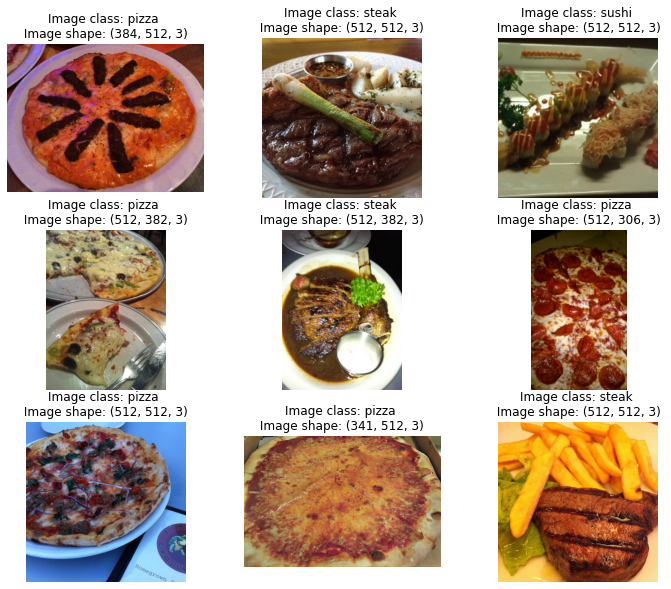

In [11]:
# Turn the image into an array
img_as_array = np.array(img)
# Plot the image
fig, axes = plt.subplots(3,3,figsize=(12,10))
# Flatten the axes array to make it easier to iterate over
axes = axes.ravel()
# Get 9 random image path
random_image_path_ = random.sample(image_path_list,9)

for ax,path in zip(axes,random_image_path_):
    image_class = path.parent.stem
    img = Image.open(path)
    img_as_array = np.array(img)
    ax.imshow(img_as_array)
    ax.set_title(f"Image class: {image_class} \n Image shape: {img_as_array.shape} ")
    ax.axis(False)